In [1]:
library('tidyverse')
library('readxl')
library('ggrepel')

library('limma')
library('edgeR')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
readxl::excel_sheets('1102025Chondrosarcoma Nanostring Normalized.xlsx')

[1] "Chondrosarcoma Nanostring Norma" "Raw data"                       
[3] "1102025Chondrosarcoma Nanostrin"

In [3]:
ns_colnames <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Chondrosarcoma Nanostring Norma',
        n_max=1
    ) %>%
    colnames()

ns_colnames

[1] "Probe Name"                                      
 [2] "Accession #"                                     
 [3] "Class Name"                                      
 [4] "20250102_30102954030325-01_10P_07.RCC"           
 [5] "20250102_30102954030325-01_12T_11.RCC"           
 [6] "20250102_30102954030325-01_16P_05.RCC"           
 [7] "20250102_30102954030325-01_17P_10.RCC"           
 [8] "20250102_30102954030325-01_18P_04.RCC"           
 [9] "20250102_30102954030325-01_2T_02.RCC"            
[10] "20250102_30102954030325-01_3P_03.RCC"            
[11] "20250102_30102954030325-01_6P_06.RCC"            
[12] "20250102_30102954030325-01_6T_08.RCC"            
[13] "20250102_30102954030325-01_8P_09.RCC"            
[14] "20250102_30102954030325-01_9P_01.RCC"            
[15] "20250102_30102954030325-01_panel standard_12.RCC"
[16] "20250102_30102954060325-01_11P_05.RCC"           
[17] "20250102_30102954060325-01_12P_02.RCC"           
[18] "20250102_30102954060325-01_13P_10.RCC"           
[19] "20250102_30102954060325-01_13T_09.RCC"           
[20] "20250102_30102954060325-01_15T_08.RCC"           
[21] "20250102_30102954060325-01_16T_01.RCC"           
[22] "20250102_30102954060325-01_19P_03.RCC"           
[23] "20250102_30102954060325-01_19T_11.RCC"           
[24] "20250102_30102954060325-01_3T_07.RCC"            
[25] "20250102_30102954060325-01_5T_04.RCC"            
[26] "20250102_30102954060325-01_8T_06.RCC"            
[27] "20250102_30102954060325-01_panel standard_12.RCC"
[28] "20250103_30102954230325-01_15P_04.RCC"           
[29] "20250103_30102954230325-01_17T_02.RCC"           
[30] "20250103_30102954230325-01_1T_03.RCC"            
[31] "20250103_30102954230325-01_4T_05.RCC"            
[32] "20250103_30102954230325-01_5P_01.RCC"            
[33] "20250103_30102954230325-01_panel standard_06.RCC"

In [4]:
cnt_wtbl <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Chondrosarcoma Nanostring Norma',
        skip=2,
        col_names=ns_colnames
    ) %>%
    select(
        -`20250102_30102954030325-01_panel standard_12.RCC`,
        -`20250102_30102954060325-01_panel standard_12.RCC`, 
        -`20250103_30102954230325-01_panel standard_06.RCC`
    )

cnt_wtbl %>%
    head()

Probe Name,Accession #,Class Name,20250102_30102954030325-01_10P_07.RCC,20250102_30102954030325-01_12T_11.RCC,20250102_30102954030325-01_16P_05.RCC,20250102_30102954030325-01_17P_10.RCC,20250102_30102954030325-01_18P_04.RCC,20250102_30102954030325-01_2T_02.RCC,20250102_30102954030325-01_3P_03.RCC,⋯,20250102_30102954060325-01_19P_03.RCC,20250102_30102954060325-01_19T_11.RCC,20250102_30102954060325-01_3T_07.RCC,20250102_30102954060325-01_5T_04.RCC,20250102_30102954060325-01_8T_06.RCC,20250103_30102954230325-01_15P_04.RCC,20250103_30102954230325-01_17T_02.RCC,20250103_30102954230325-01_1T_03.RCC,20250103_30102954230325-01_4T_05.RCC,20250103_30102954230325-01_5P_01.RCC
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NM_000014.4,Endogenous,4593,27,22,6,16,6406,14024,⋯,344,2785,9979,45,14508,16,10,123,373,43
ACVR1C,NM_145259.2,Endogenous,51,11,18,5,7,19,30,⋯,181,208,12,9,40,8,8,3,20,2
ADAM12,NM_003474.5,Endogenous,172,19,15,7,23,934,590,⋯,267,1382,637,17,849,18,8,30,26,6
ADGRE1,NM_001256252.1,Endogenous,14,15,18,4,11,42,18,⋯,78,166,11,8,23,9,14,12,17,4
ADM,NM_001124.2,Endogenous,406,22,26,6,12,133,313,⋯,107,678,136,12,92,12,8,15,34,10
ADORA2A,NM_000675.5,Endogenous,36,12,10,5,8,105,63,⋯,48,92,35,11,86,12,5,35,20,7


In [5]:
sample_tbl <-
    tibble(
        `sample_name`=
            cnt_wtbl %>%
            select(-`Probe Name`, -`Accession #`, -`Class Name`) %>%
            colnames()
    ) %>%
    mutate(
        `sample_name_simple`=
            `sample_name` %>%
            str_replace_all('.*-01_', '') %>%
            str_replace_all('_.*', ''),
        `sample_id`=str_replace_all(`sample_name_simple`, '[PT]', ''),
        `sample_type`=str_replace_all(`sample_name_simple`, '[0-9]', ''),
        `sample_id`=fct_reorder(`sample_id`, parse_integer(`sample_id`))
    ) %>%
    arrange(`sample_id`)

sample_tbl

sample_name,sample_name_simple,sample_id,sample_type
<chr>,<chr>,<fct>,<chr>
20250103_30102954230325-01_1T_03.RCC,1T,1,T
20250102_30102954030325-01_2T_02.RCC,2T,2,T
20250102_30102954030325-01_3P_03.RCC,3P,3,P
20250102_30102954060325-01_3T_07.RCC,3T,3,T
20250103_30102954230325-01_4T_05.RCC,4T,4,T
20250102_30102954060325-01_5T_04.RCC,5T,5,T
20250103_30102954230325-01_5P_01.RCC,5P,5,P
20250102_30102954030325-01_6P_06.RCC,6P,6,P
20250102_30102954030325-01_6T_08.RCC,6T,6,T


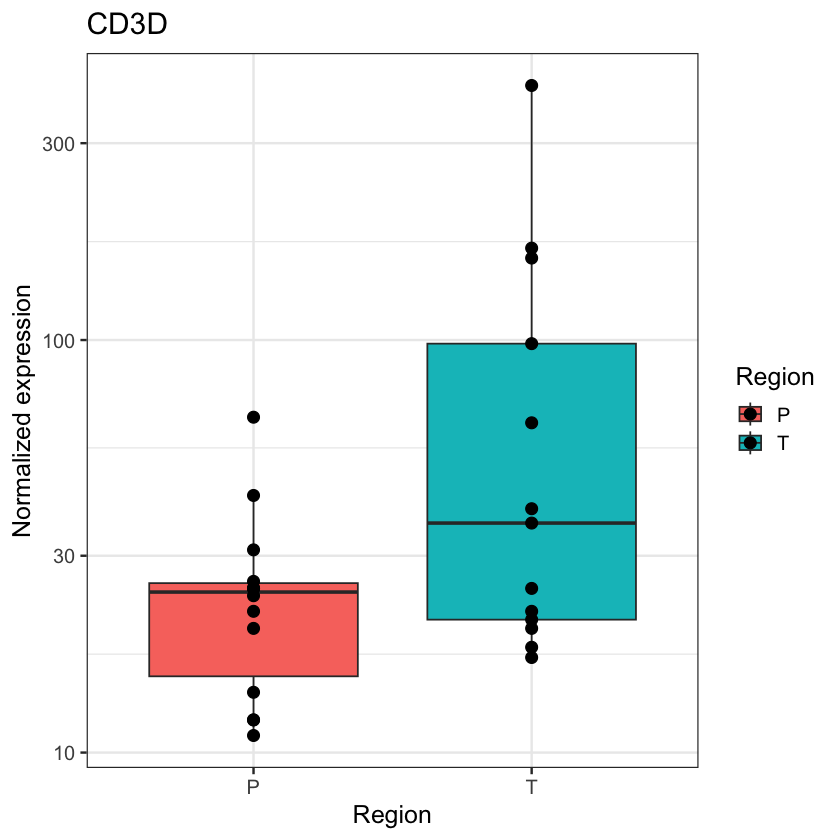

In [6]:
plot_gene <- function(gene_symbol) {
    cnt_wtbl %>%
    select(-`Accession #`, -`Class Name`) %>%
    filter(`Probe Name` == gene_symbol) %>%
    pivot_longer(
        names_to='sample_name',
        values_to='norm_exp',
        -`Probe Name`
    ) %>%
    left_join(sample_tbl, by='sample_name') %>%
    ggplot(aes(x=`sample_type`, fill=`sample_type`, y=`norm_exp`)) +
        geom_boxplot() +
        geom_point(size=3) +
        theme_bw(base_size=15) +
        labs(
            y='Normalized expression',
            x='Region',
            fill='Region',
            title=gene_symbol
        ) +
        scale_y_log10()
}

plot_gene('CD3D')

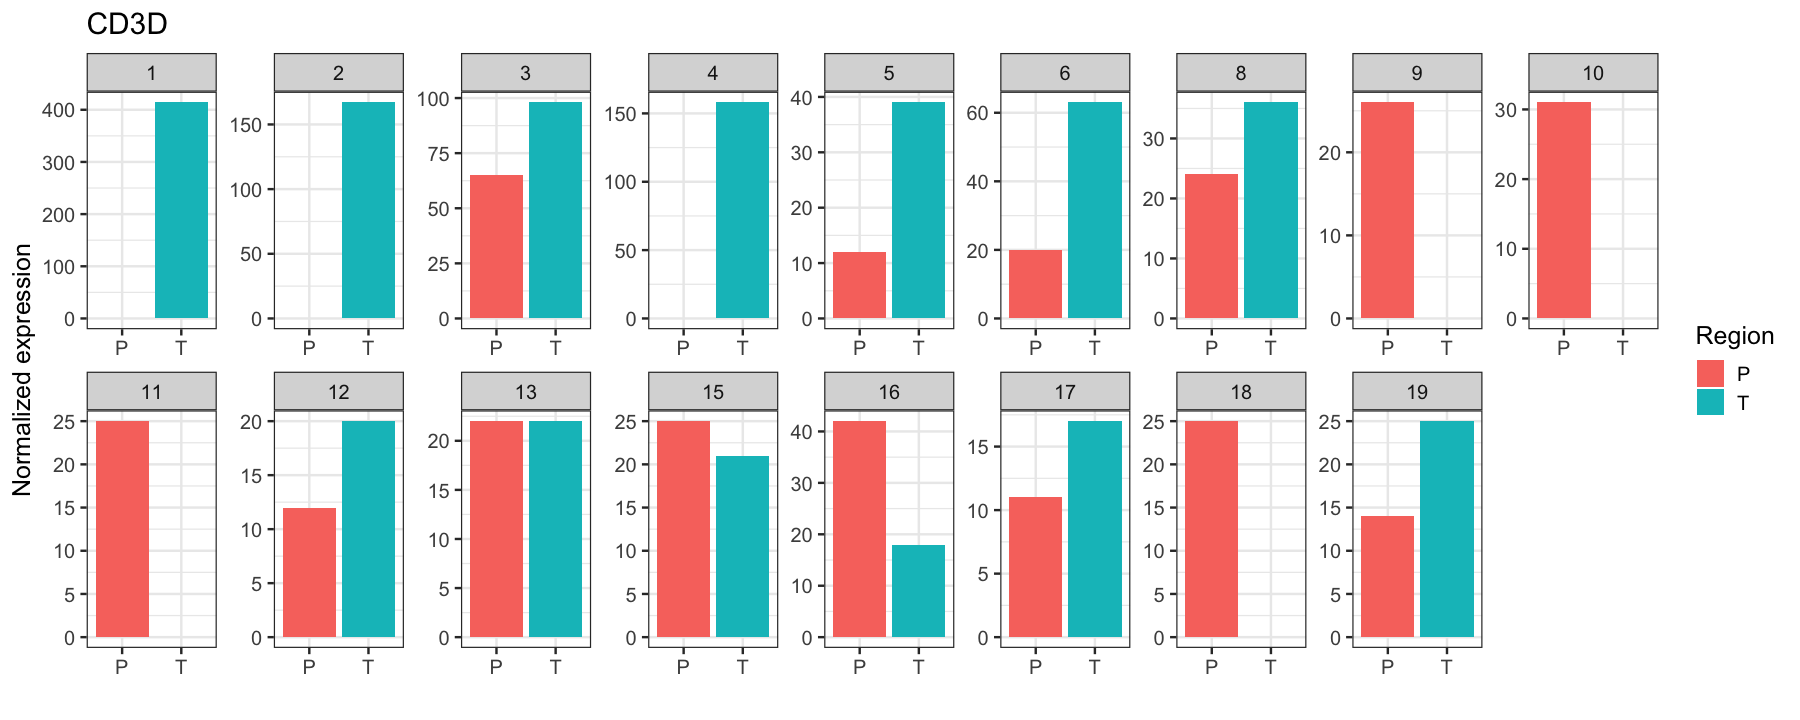

In [7]:
plot_gene_paired <- function(gene_symbol) {
    cnt_wtbl %>%
    select(-`Accession #`, -`Class Name`) %>%
    filter(`Probe Name` == gene_symbol) %>%
    pivot_longer(
        names_to='sample_name',
        values_to='norm_exp',
        -`Probe Name`
    ) %>%
    left_join(sample_tbl, by='sample_name') %>%
    ggplot(aes(x=`sample_type`, fill=`sample_type`, y=`norm_exp`)) +
        geom_col() +
        theme_bw(base_size=15) +
        facet_wrap(~`sample_id`, scale='free', nrow=2) +
        labs(
            y='Normalized expression',
            x='',
            fill='Region',
            title=gene_symbol
        ) +
        scale_x_discrete(limits=c('P', 'T'))
}

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired('CD3D')
options(org_opts)

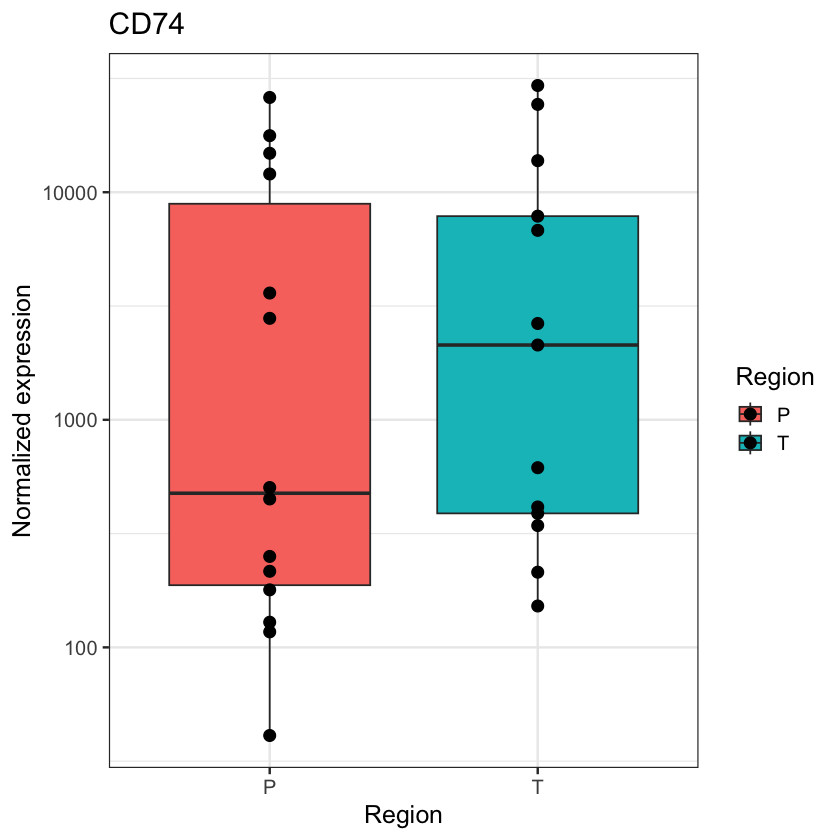

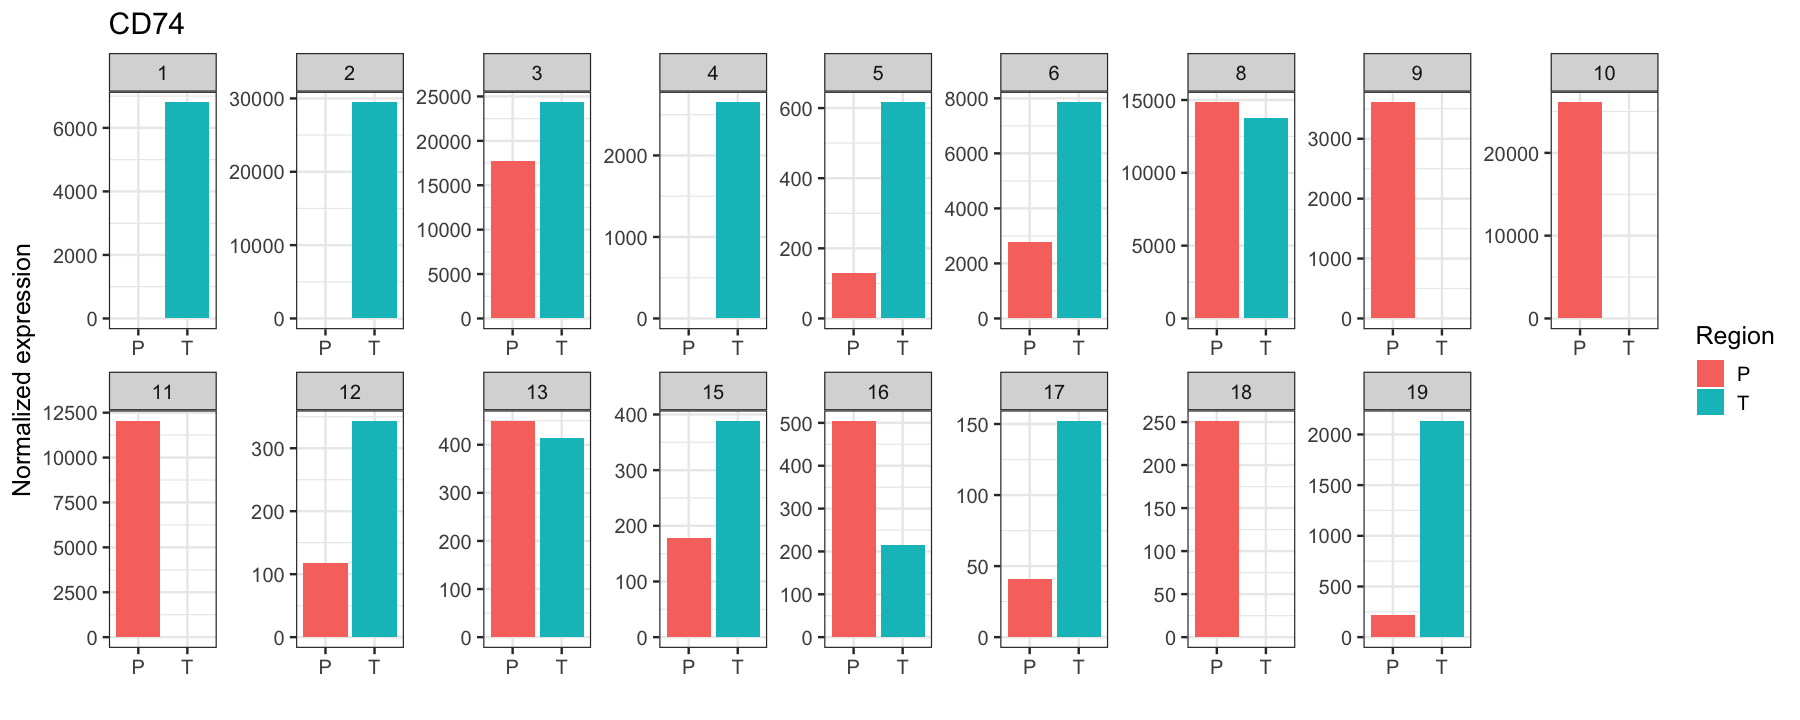

In [8]:
query_gene <- 'CD74'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

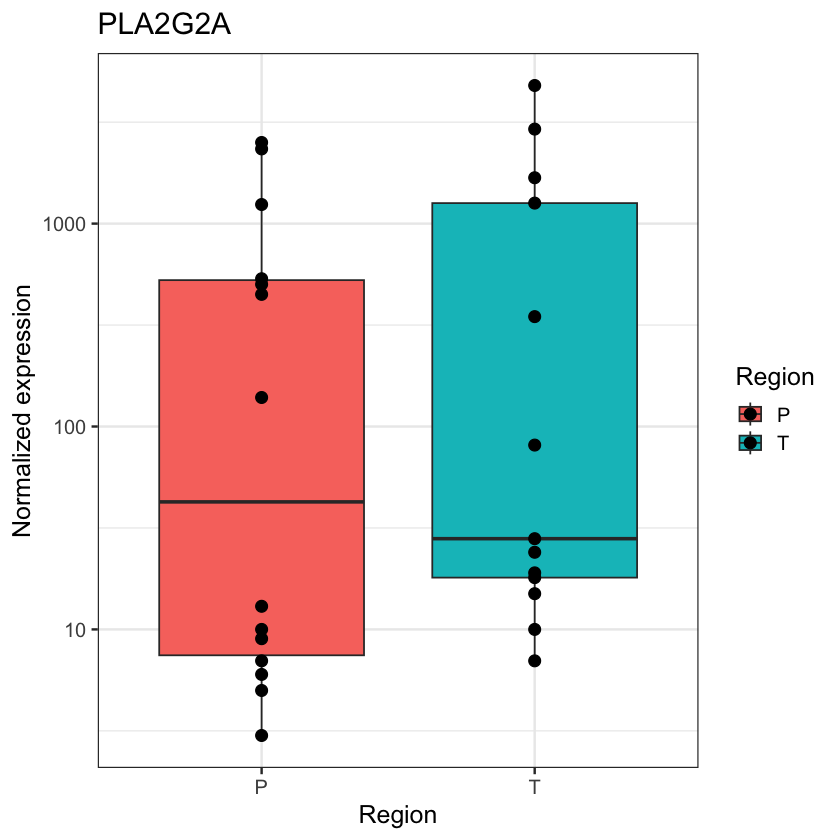

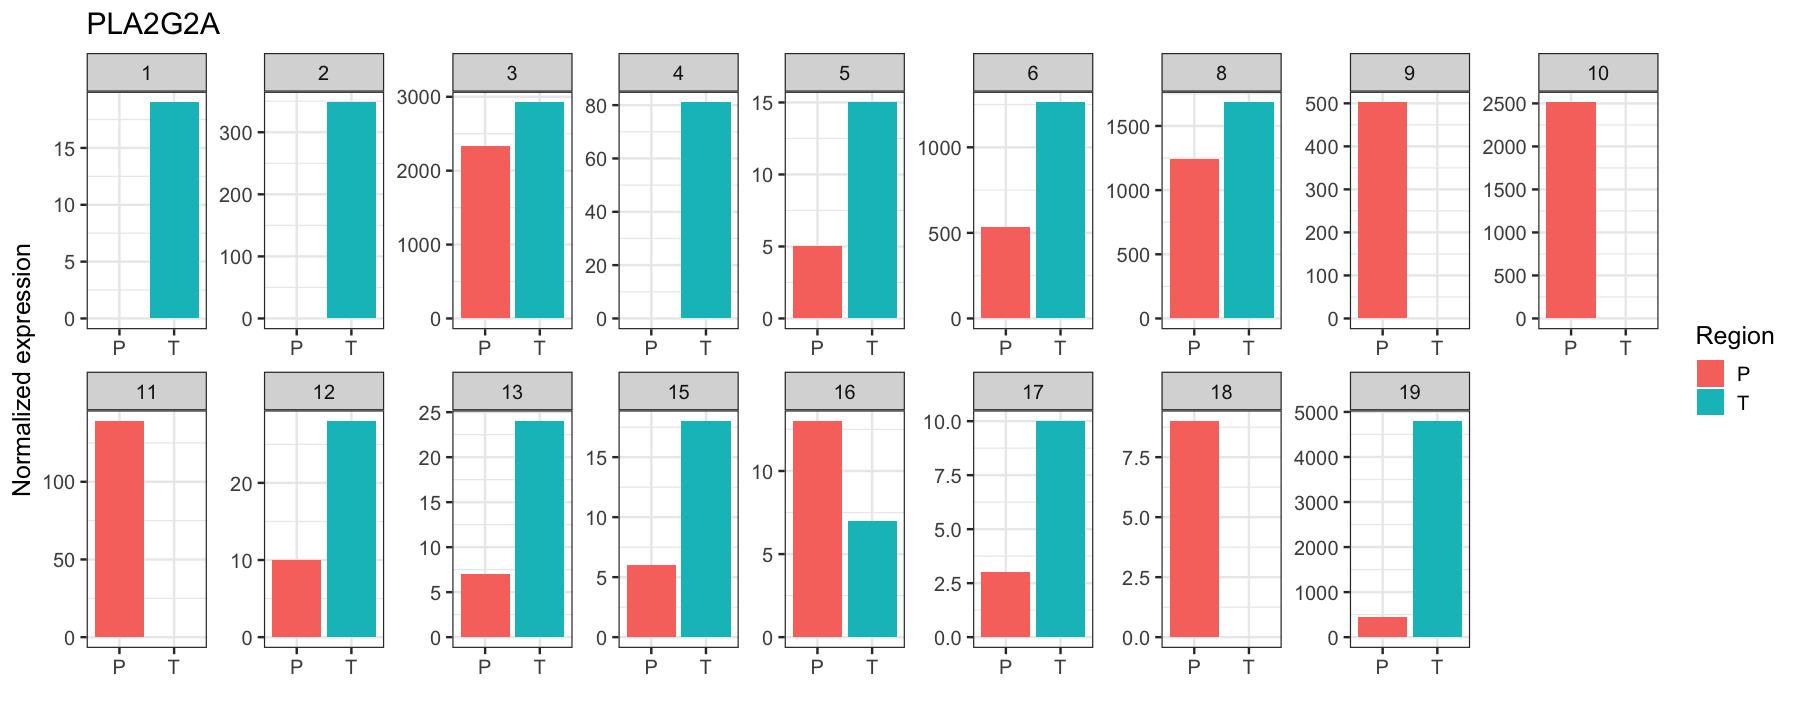

In [9]:
query_gene <- 'PLA2G2A'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

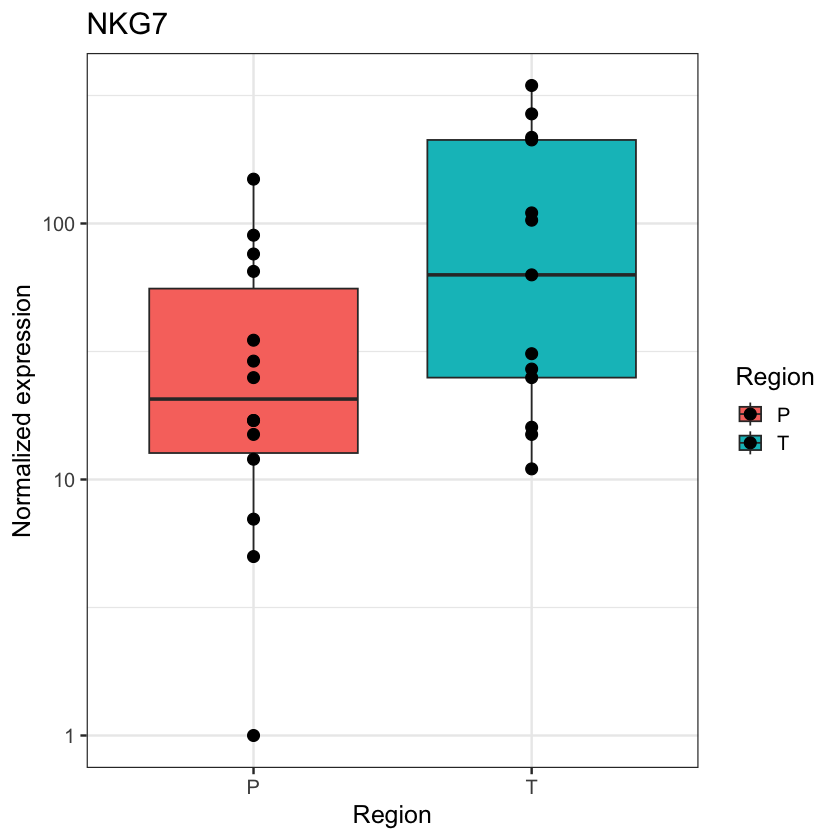

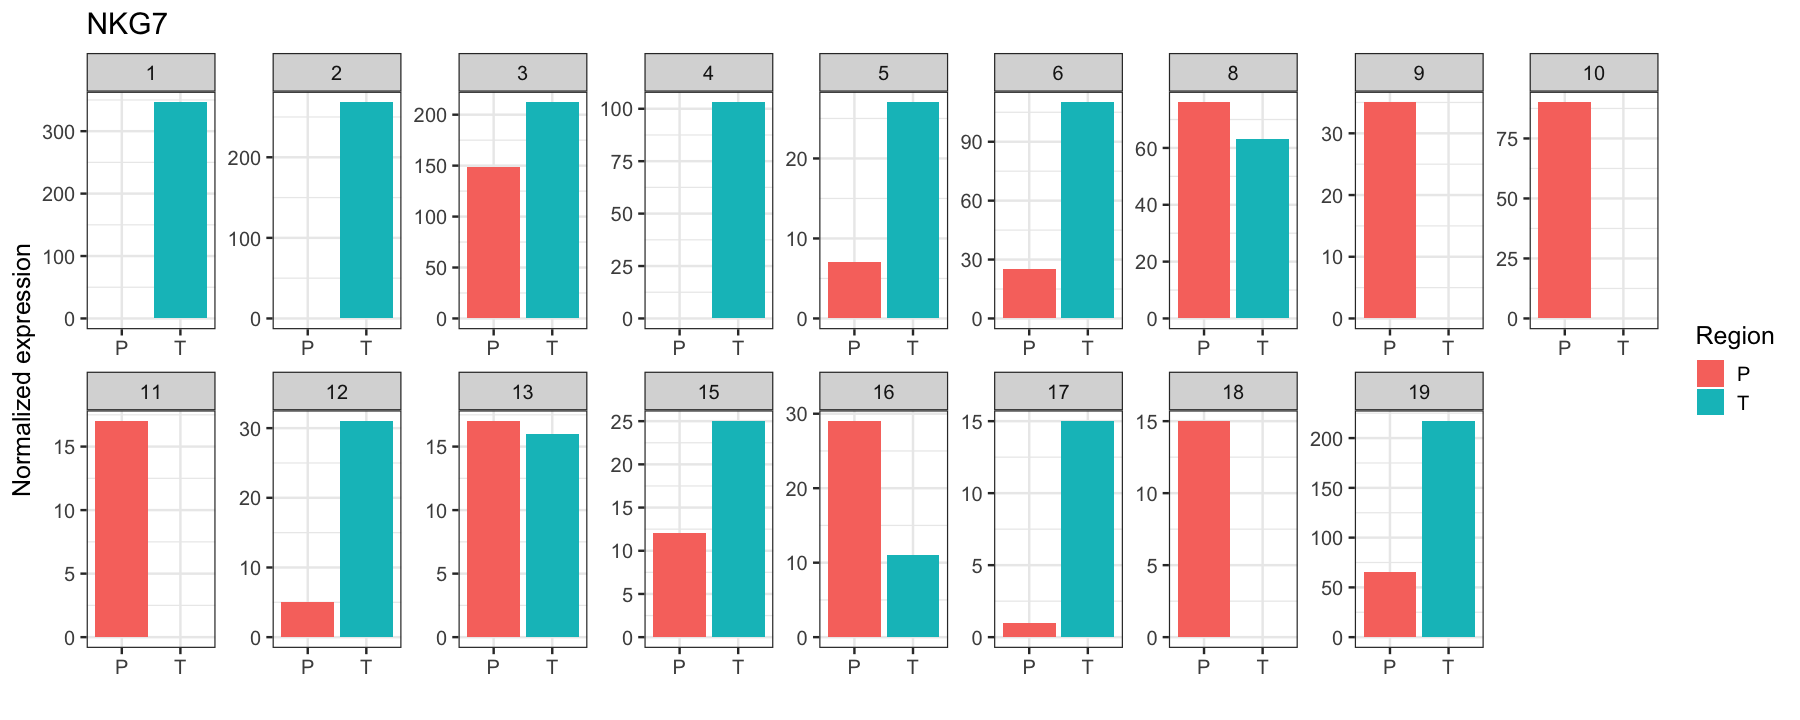

In [10]:
query_gene <- 'NKG7'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

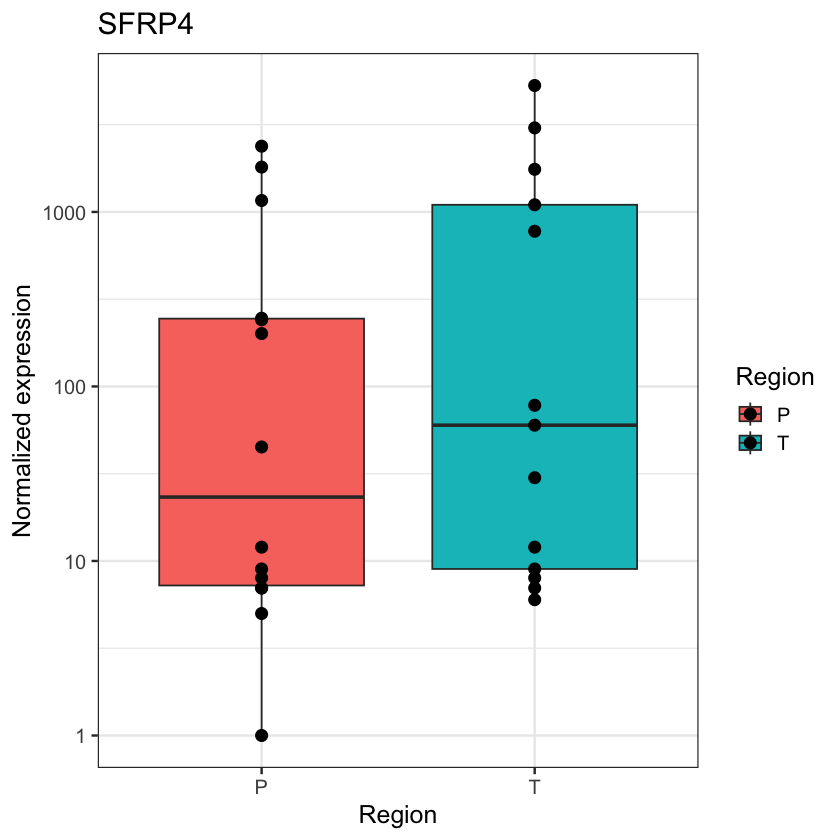

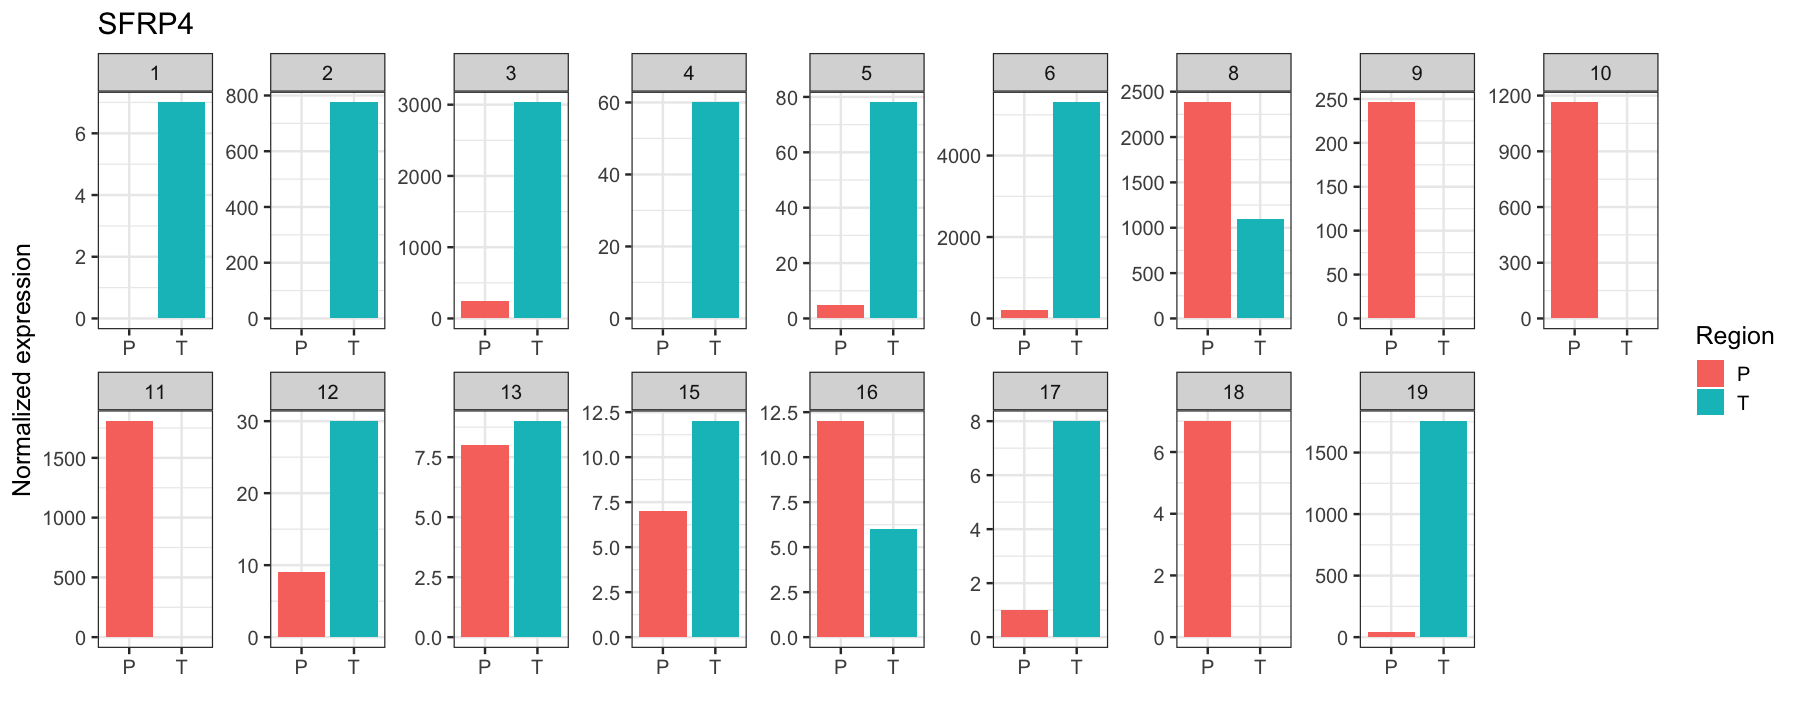

In [11]:
query_gene <- 'SFRP4'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

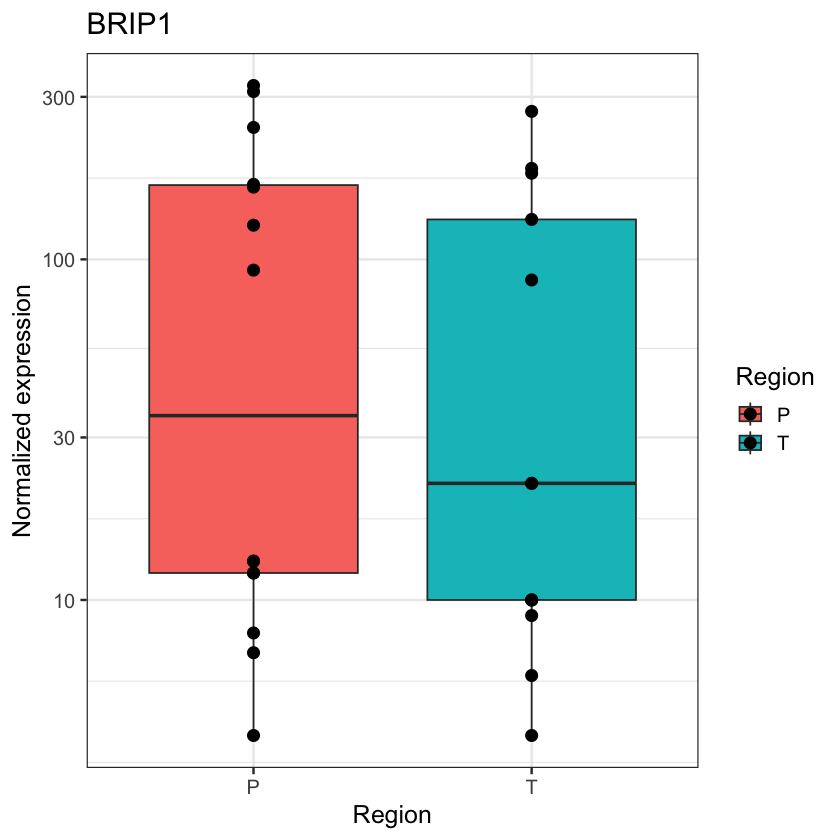

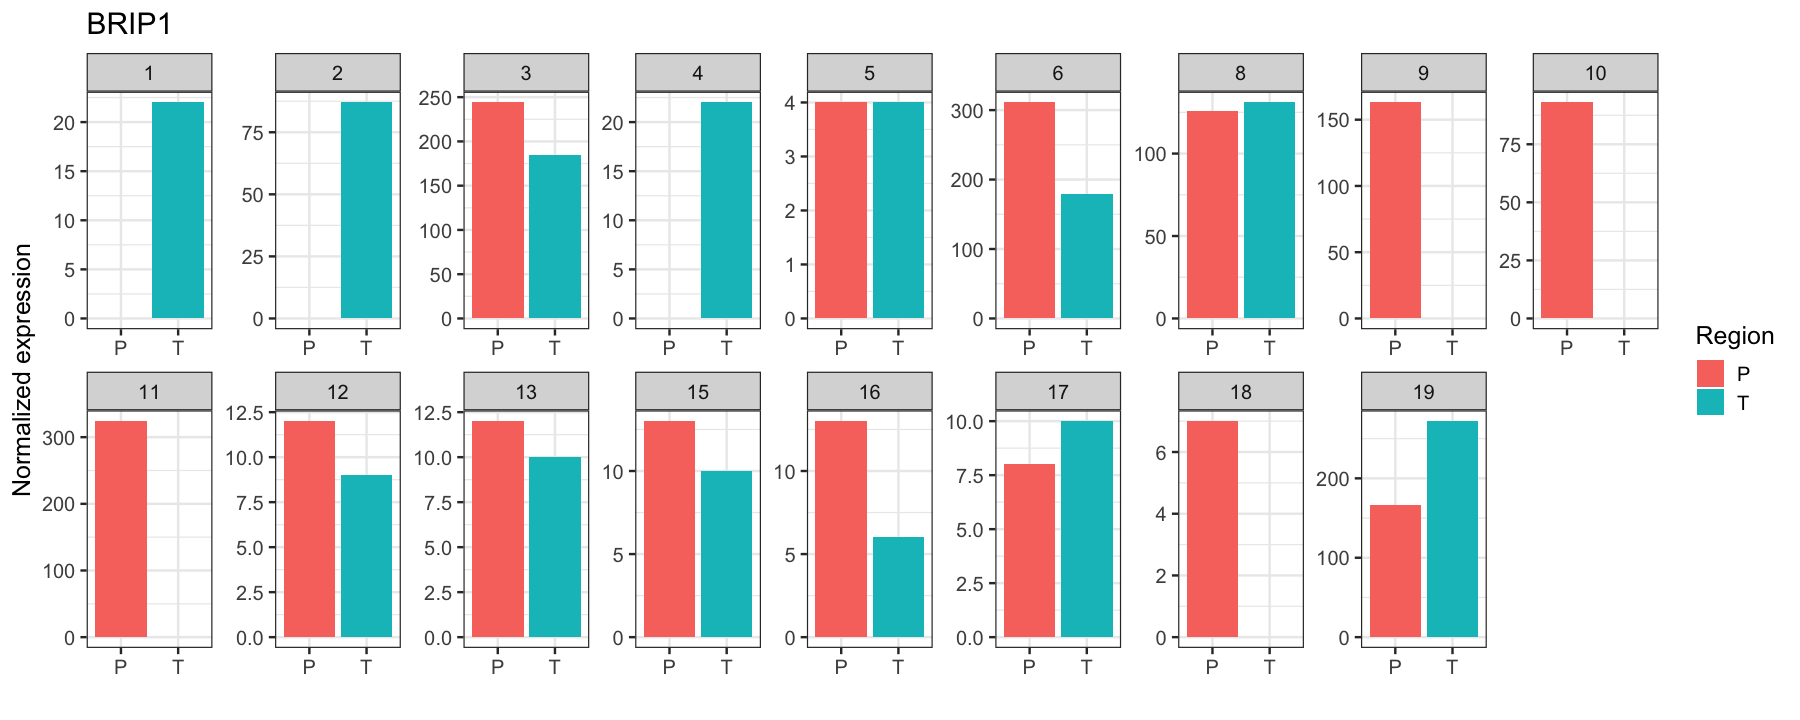

In [12]:
query_gene <- 'BRIP1'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

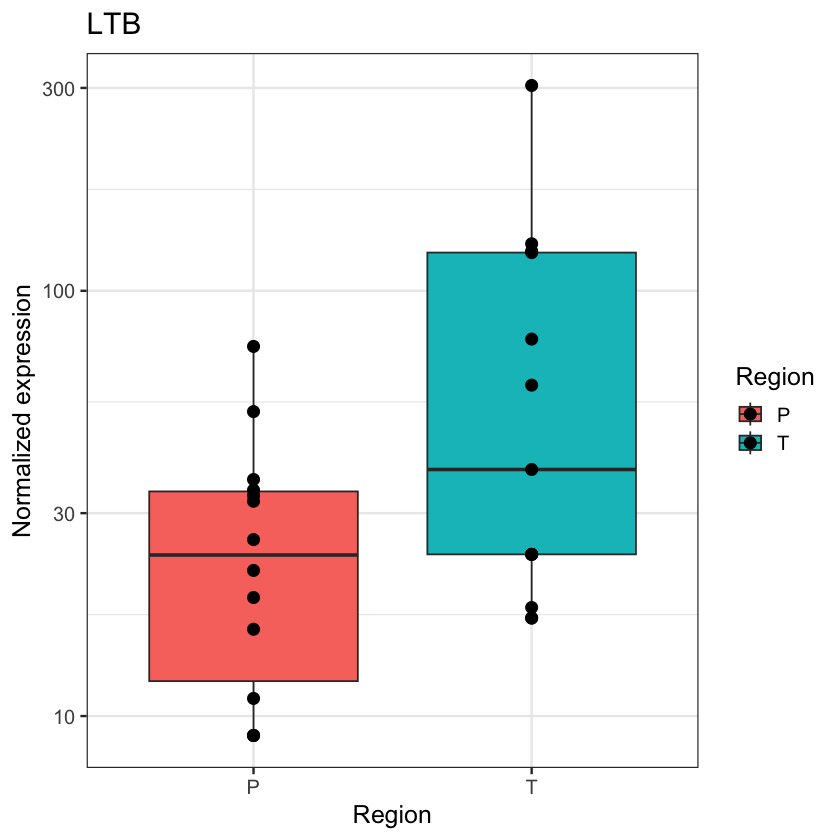

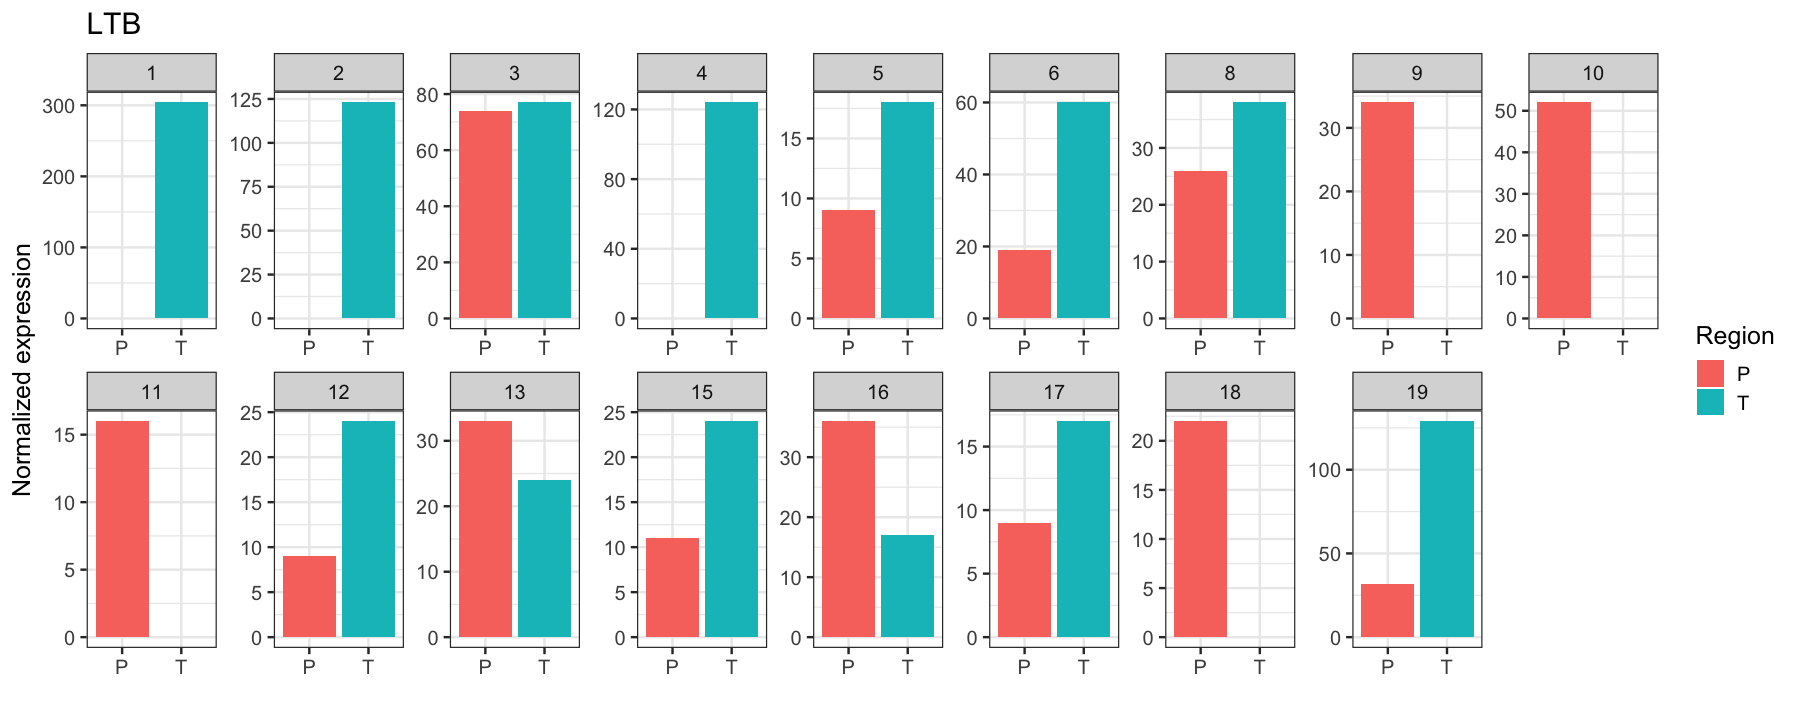

In [13]:
query_gene <- 'LTB'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

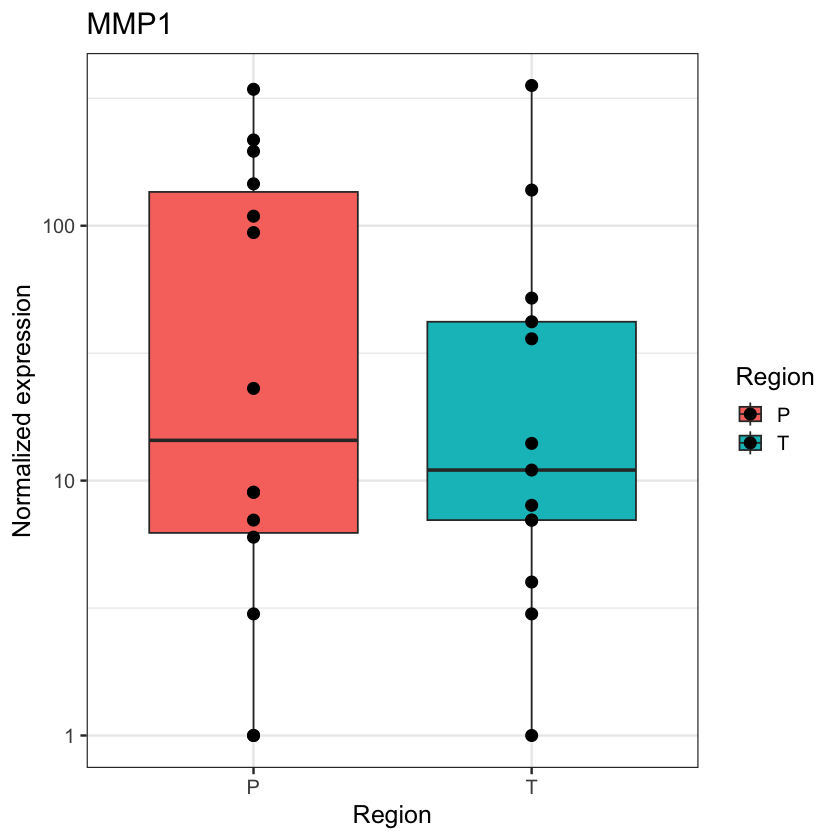

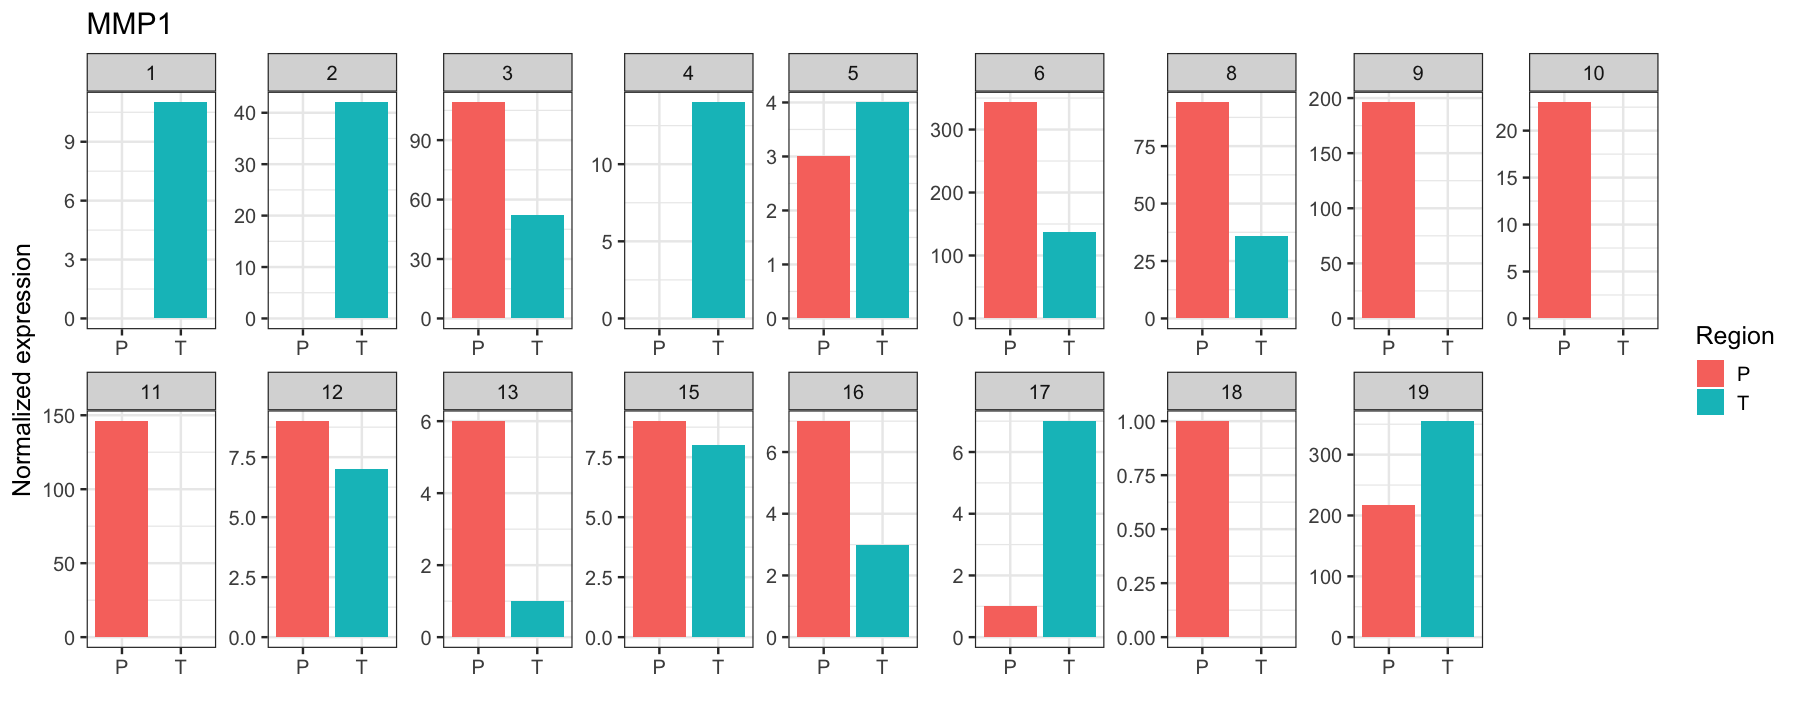

In [14]:
query_gene <- 'MMP1'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pas

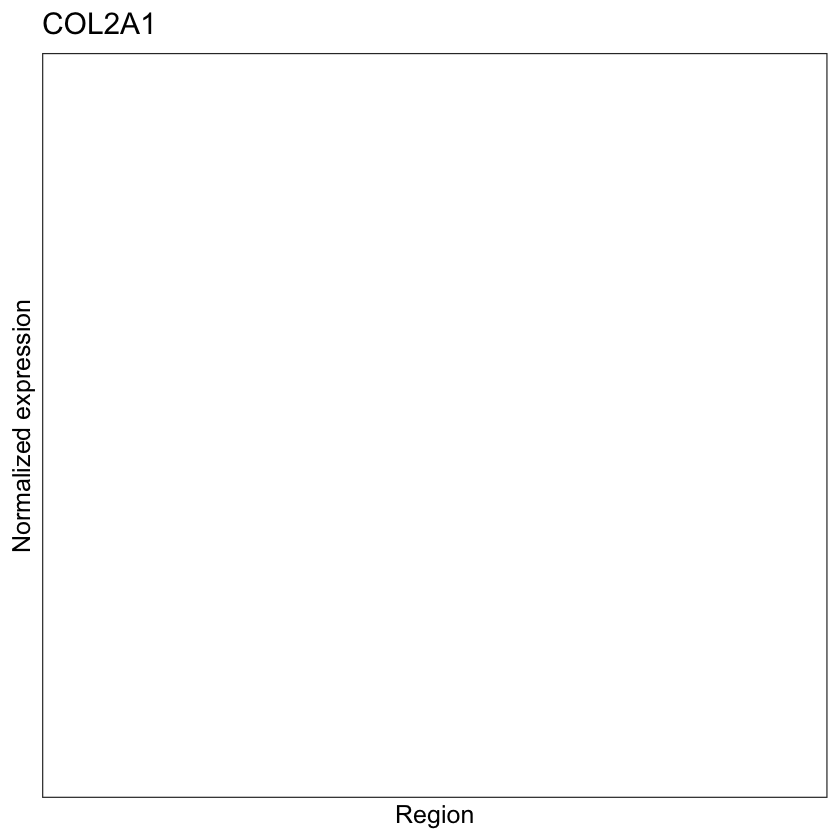

In [15]:
query_gene <- 'COL2A1'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

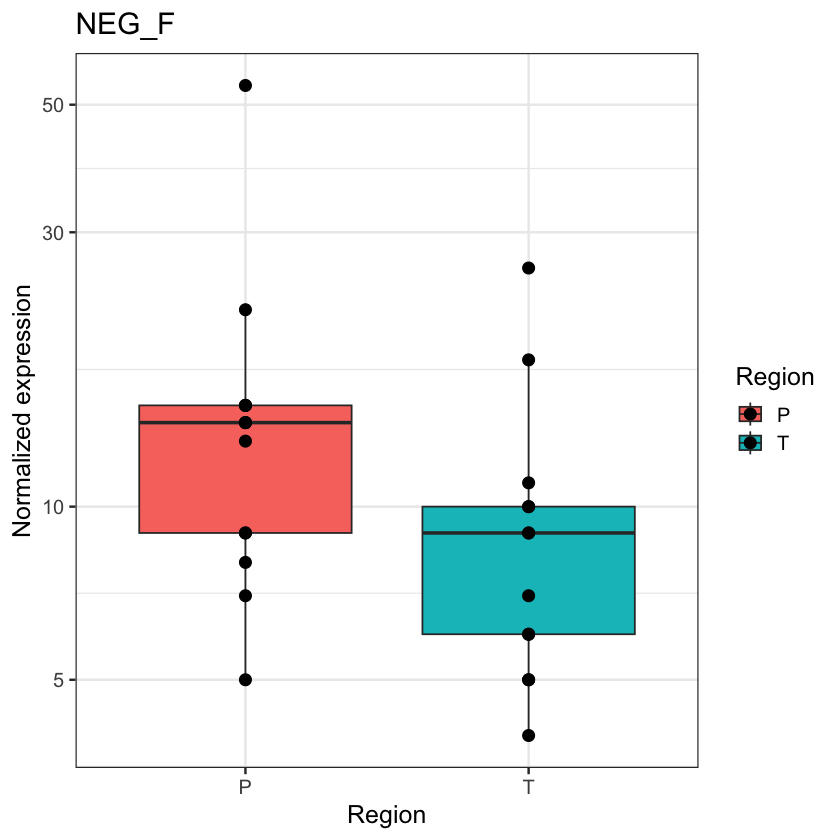

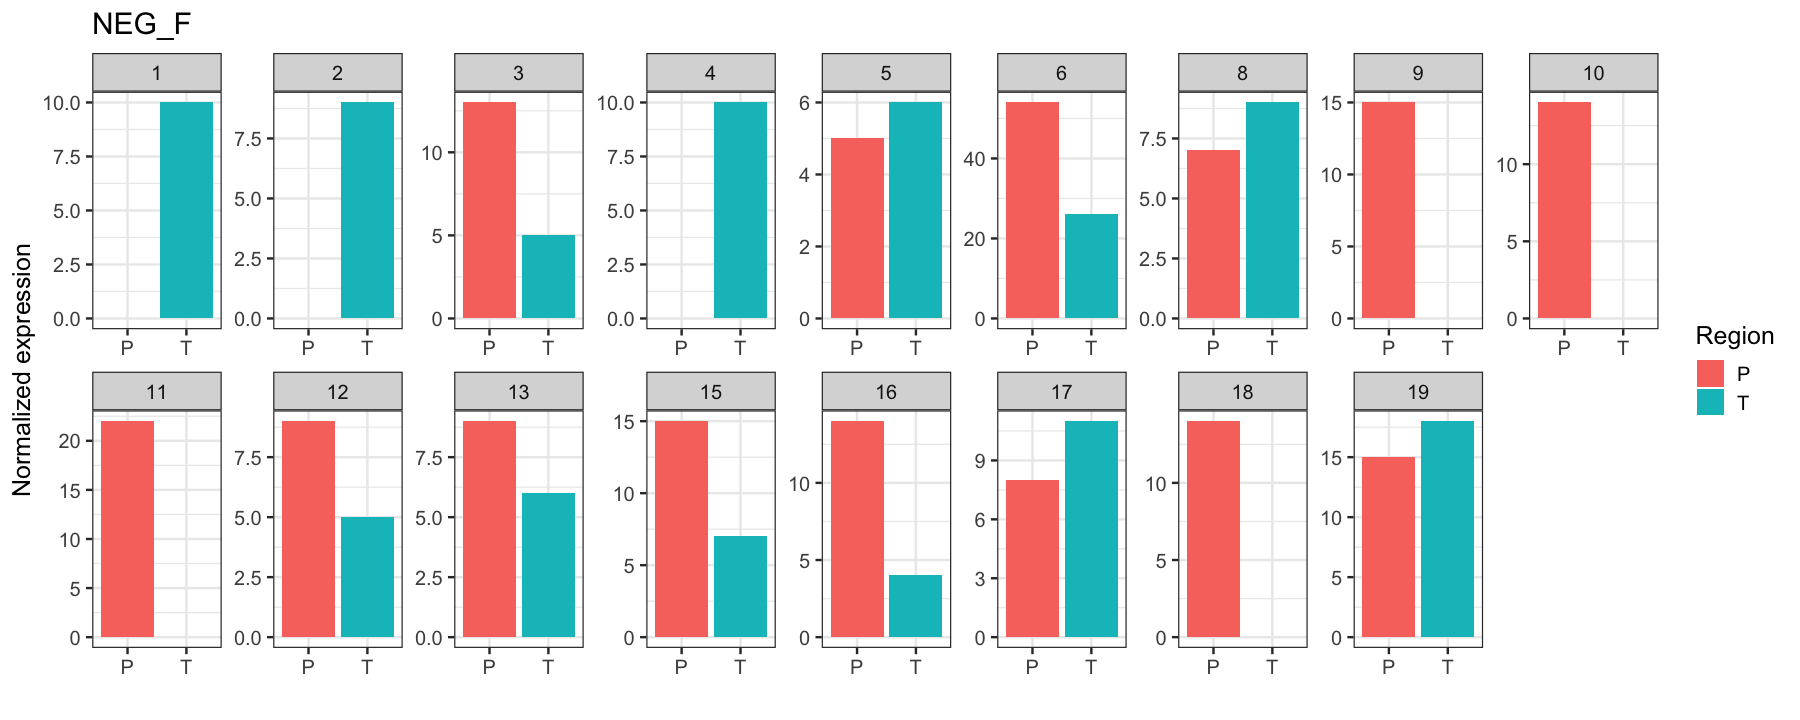

In [16]:
query_gene <- 'NEG_F'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)

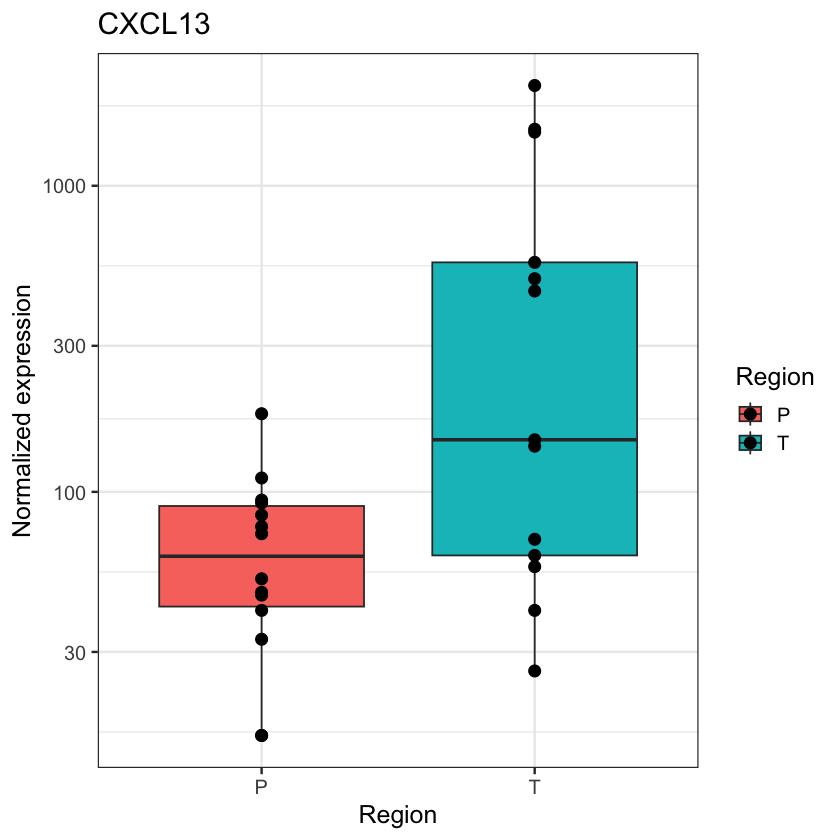

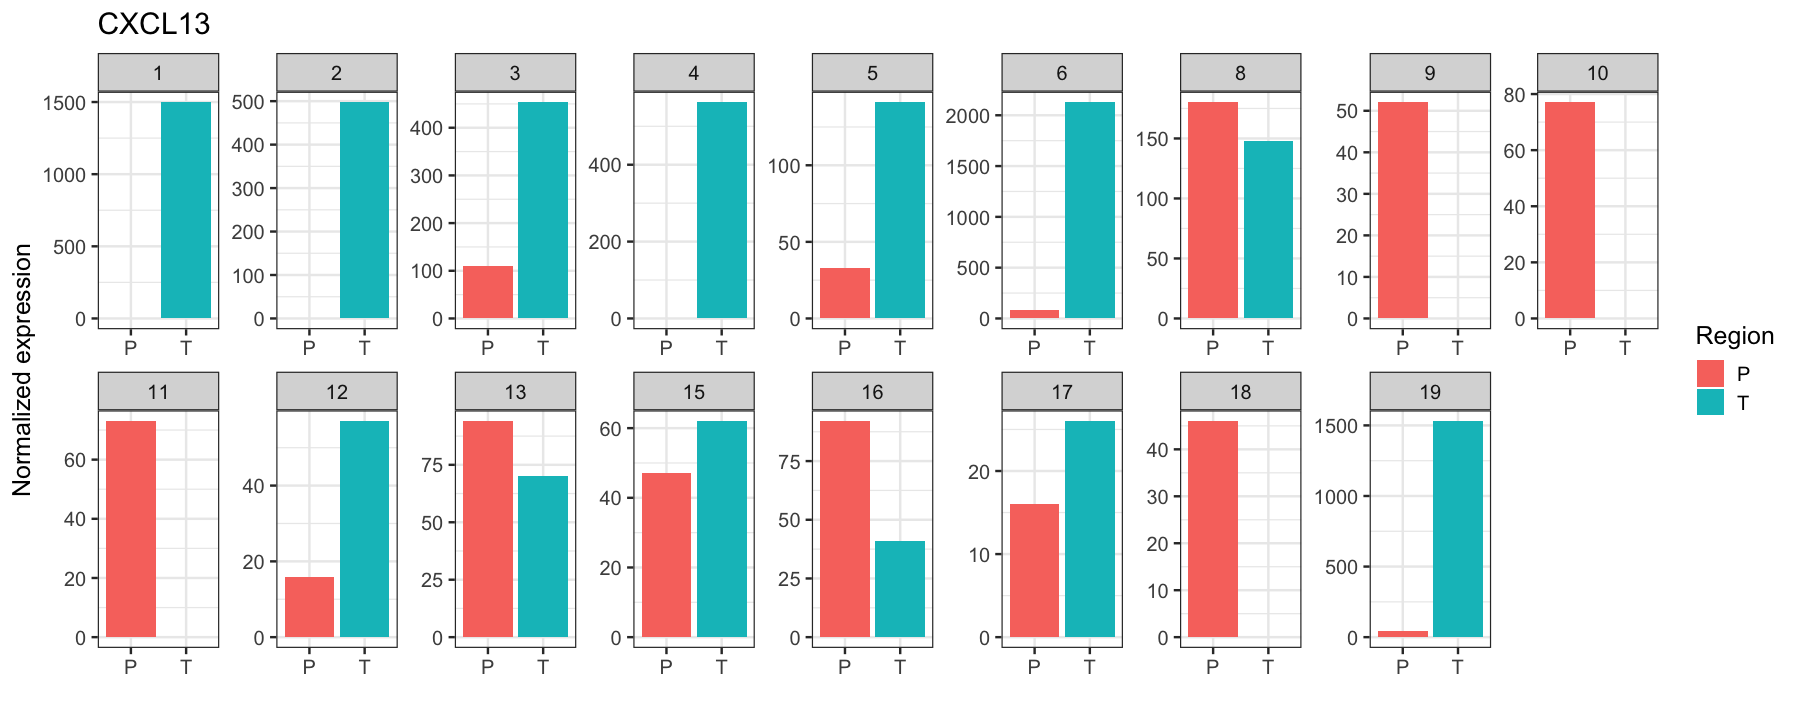

In [17]:
query_gene <- 'CXCL13'

plot_gene(query_gene)

options(repr.plot.width=15, repr.plot.height=6)
plot_gene_paired(query_gene)
options(org_opts)